# Praca domowa 7

## Wstęp

Zaczynamy od przygotowania poszczególnych bibliotek. Szczególnie istotne są te, które służą do wizualizacji oraz pracy z PCA.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from sklearn.decomposition import PCA
import pandas as pd

Ładujemy obraz przedstawiający wizualizację centrum Warszawy już za kilka miesięcy.

In [2]:
wwa = img.imread('Varso.png')

Definiujemy również funkcję, która przyda się do obliczania stosunków objętości obrazów po kompresji do oryginału.

In [3]:
def size_of_image(img):
    '''
    funkcja oblicza objętość obrazka
    '''
    result = 1
    for i in img.shape:
        result *= i
    return result

Warto sprawdzić jakie są wymiary rozważanego obrazka przed przekształceniem go do dwuwymiarowej macierzy.

In [4]:
wwa.shape

(886, 1772, 3)

Teraz można wreszcie przyjrzeć się oryginalnemu obrazowi, a następnie przekształcić go we, wspomnianą, macierz 2D.

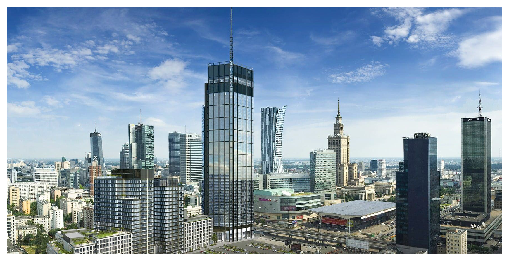

In [5]:
plt.figure(figsize = (8.86, 17.72))
plt.axis('off')
plt.imshow(wwa)

In [6]:
varso = np.reshape(wwa, (wwa.shape[0], wwa.shape[1] * wwa.shape[2]))

## Kompresja
Pamiętając o oryginalnych wymiarach obrazu przeprowadzony zostanie na nim algorytm PCA o 400, 100 oraz 25 komponentach.

In [7]:
pca1 = PCA(n_components = 400).fit(varso)
pca2 = PCA(n_components = 100).fit(varso)
pca3 = PCA(n_components = 25).fit(varso)
cmpr1 = pca1.transform(varso)
cmpr2 = pca2.transform(varso)
cmpr3 = pca3.transform(varso)
rcmpr1 = np.reshape(pca1.inverse_transform(cmpr1), (wwa.shape[0], wwa.shape[1], wwa.shape[2]))
rcmpr2 = np.reshape(pca2.inverse_transform(cmpr2), (wwa.shape[0], wwa.shape[1], wwa.shape[2]))
rcmpr3 = np.reshape(pca3.inverse_transform(cmpr3), (wwa.shape[0], wwa.shape[1], wwa.shape[2]))

Warto spojrzeć na wyniki przeprowadzonych przekształceń.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Obraz po kompresji PCA 25 komponentów')

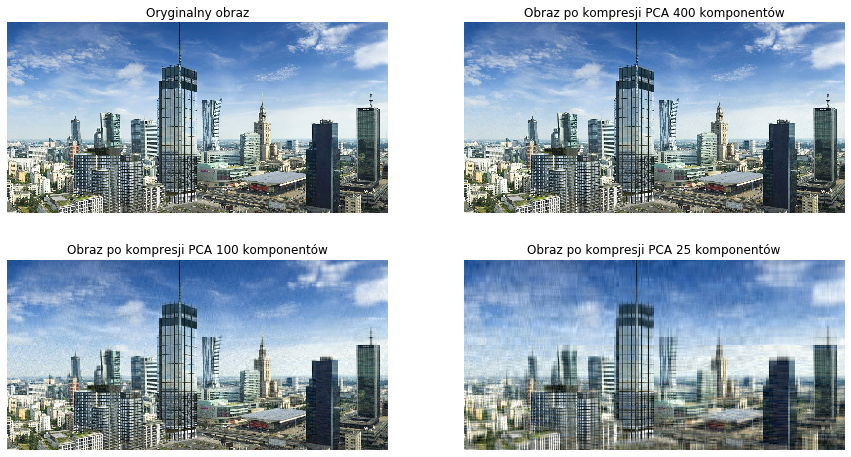

In [8]:
_, axes = plt.subplots(2, 2, figsize=(15, 8))
axes[0][0].axis('off')
axes[0][0].imshow(wwa)
axes[0][0].set_title("Oryginalny obraz")
axes[0][1].axis('off')
axes[0][1].imshow(rcmpr1)
axes[0][1].set_title("Obraz po kompresji PCA 400 komponentów")
axes[1][0].axis('off')
axes[1][0].imshow(rcmpr2)
axes[1][0].set_title("Obraz po kompresji PCA 100 komponentów")
axes[1][1].axis('off')
axes[1][1].imshow(rcmpr3)
axes[1][1].set_title("Obraz po kompresji PCA 25 komponentów")

Warto zauważyć, że zmniejszenie do 400 komponentów nie spowodowało praktycznie żadnej widocznej zmiany wizualizacji, chociaż 400 to mniej niż połowa oryginalnej liczby komponentów. Dopiero dalszy krok związany jest z widoczną deformacją, zwłaszcza dostrzegalną na niebie. Wreszcie finalny obraz bardziej przypomnia dzieło impresjonistycznego malarza niż współczesne zdjęcie za jakie ta wizualizacja ma uchodzić. Jednakże, również w tym przypadku widać prawie wszystkie przedstawione budynki, a mamy już do czynienia ze zmniejszeniem liczby komponentów ponad 35-krotnym.

## Porównanie

Dobrze będzie poświęcić chwilę, aby dokładniej przyjrzeć się otrzymanym obrazom.

In [9]:
pca = PCA()
pca.fit(varso)
exp_var = pca.explained_variance_ratio_.cumsum()
results = pd.DataFrame({
    '400 komponentów': [exp_var[400], size_of_image(wwa)/size_of_image(cmpr1)],
    '100 komponentów': [exp_var[100], size_of_image(wwa)/size_of_image(cmpr2)],
    '25 komponentów' : [exp_var[25], size_of_image(wwa)/size_of_image(cmpr3)]})
results.rename(index={0: 'Wyjaśniona wariancja',
                 1: 'Zmniejszenie'},
          inplace=True)

In [10]:
results.round(3)

,400 komponentów,100 komponentów,25 komponentów
Wyjaśniona wariancja,0.998,0.952,0.852
Zmniejszenie,13.290,53.160,212.640


Jak widać w każdym przypadku wyjaśnione zostało ponad 85% wariancji, a w pierwszym przypadku prawie 99%. Wówczas też obraz zmniejszony został ponad 13-krotnie, co już stanowi spory zysk. Ciekawym wydaje się być środkowy przypadek, ponieważ wówczas nastąpiło zmniejszenie aż ponad 53-krotne, wyjaśnione zostało ponad 95% wariancji, a sam obraz określony został jako czytelny, chociaż z widoczną deformacją.

## Oświadczenie
Oświadczam, że niniejsza praca stanowiąca podstawę do uznania osiągnięcia efektów uczenia się z przedmiotu Wstęp do Uczenia Maszynowego została wykonana przeze mnie samodzielnie.

Imię i Nazwisko:   Konrad Welkier